## Gaussian Mixture Model (GMM)

In [ ]:
clusterer_GMM = GaussianMixture(n_components=7, random_state=10)
cluster_labels_GMM = clusterer_GMM.fit_predict(dataset)

### Experimentación GMM

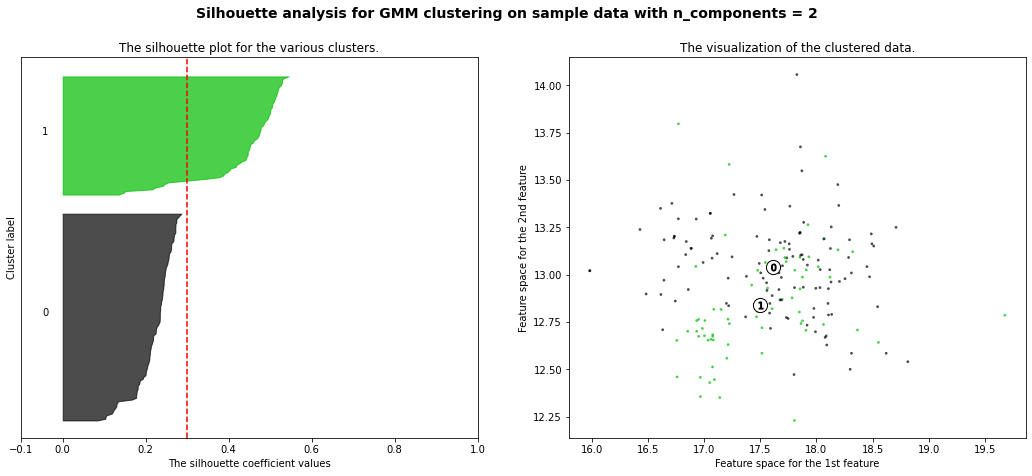

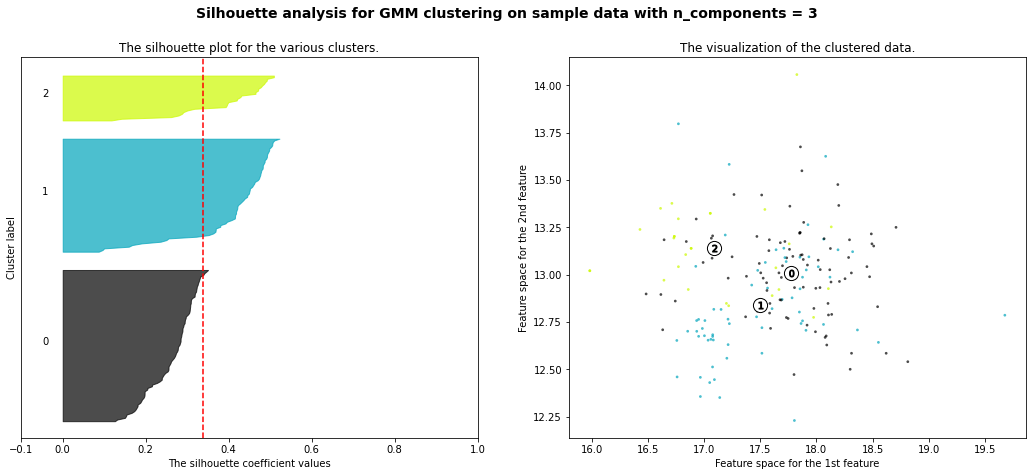

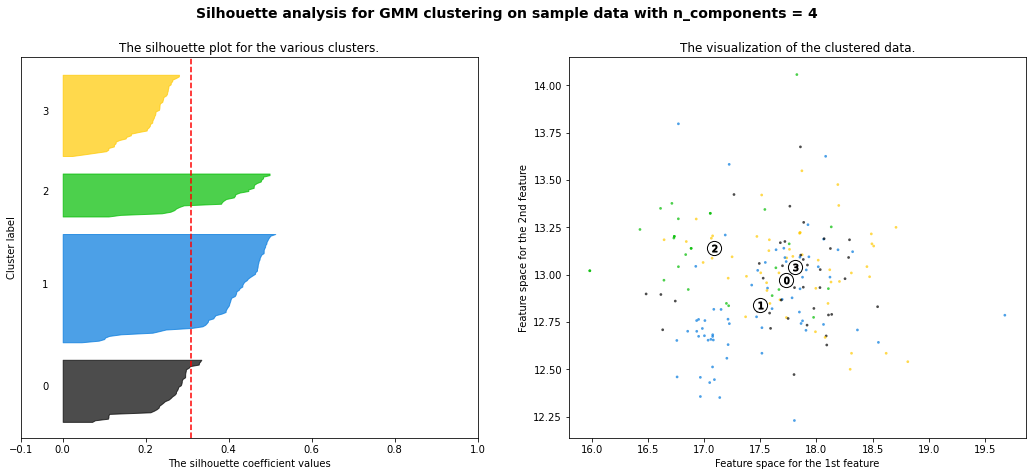

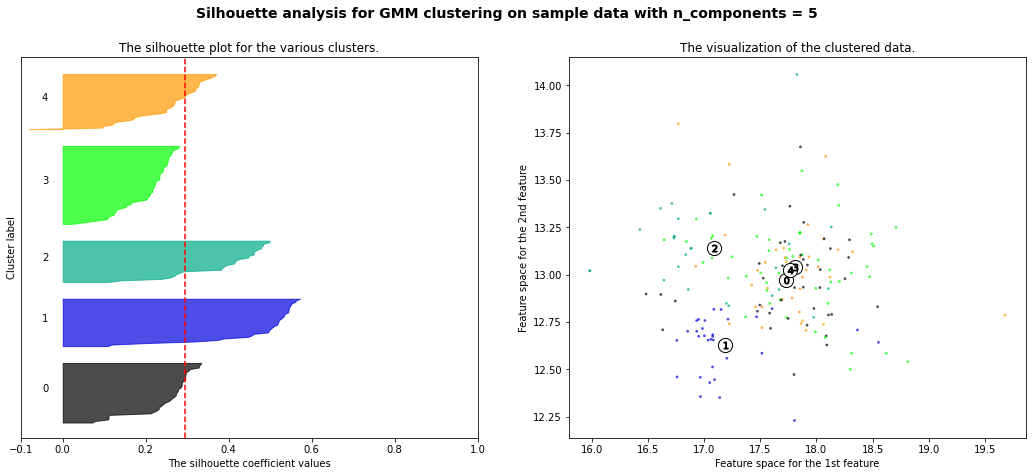

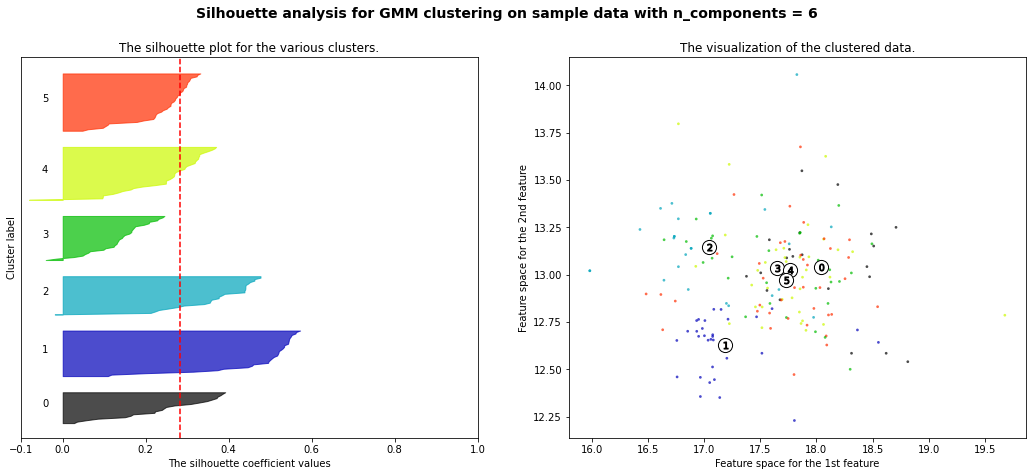

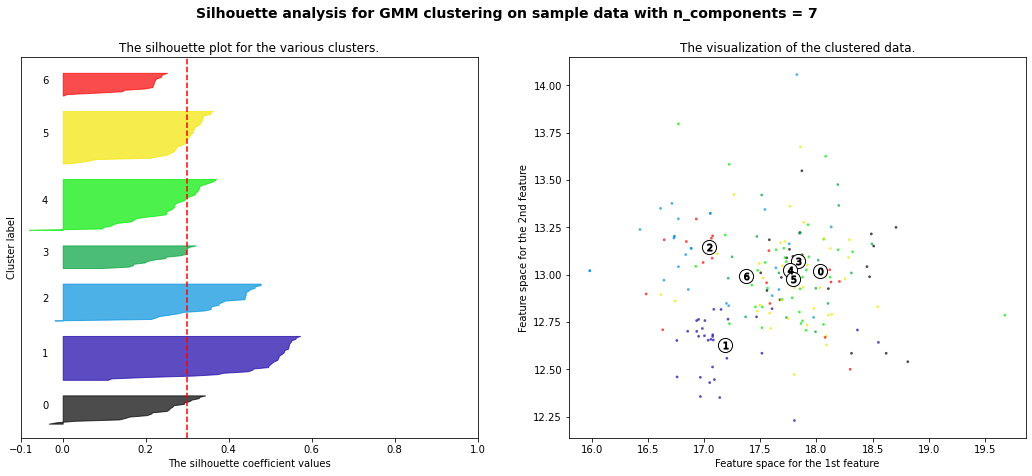

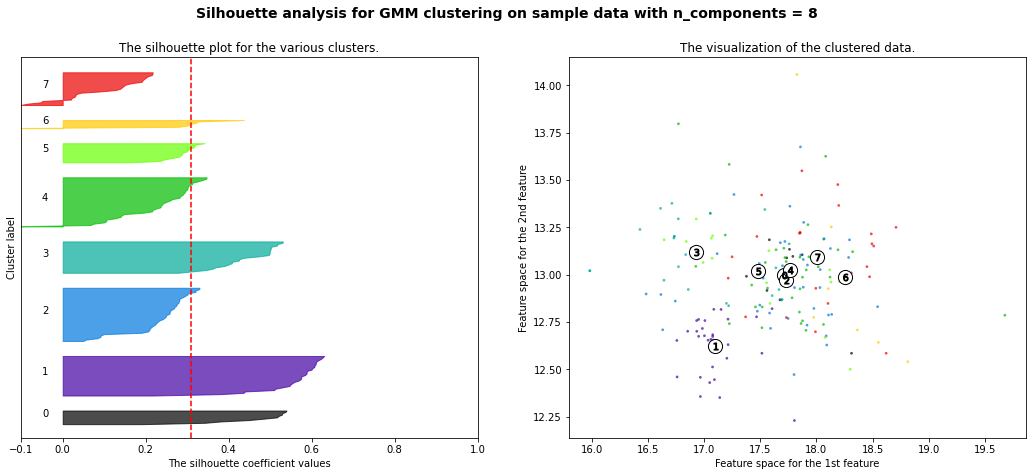

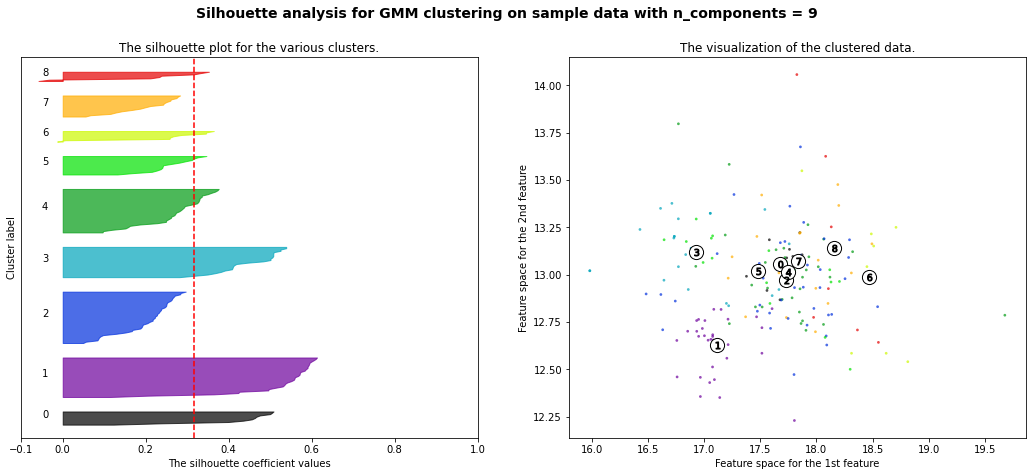

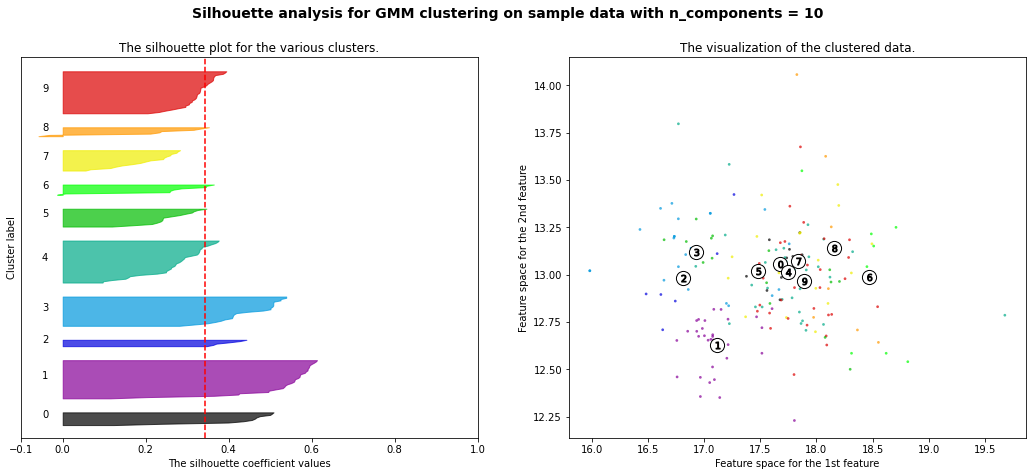

In [ ]:
for n_component in n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)

    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(dataset) + (n_component + 1) * 10])

    clusterer_GMM = GaussianMixture(n_components=n_component, random_state=10)
    cluster_labels_GMM = clusterer_GMM.fit_predict(dataset)
    silhouette_avg = silhouette_score(dataset, cluster_labels_GMM)

    sample_silhouette_values = silhouette_samples(dataset, cluster_labels_GMM)

    y_lower = 10

    for i in range(n_component):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_GMM == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_component)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels_GMM.astype(float) / n_component)
    ax2.scatter(
        dataset[:, 0], dataset[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer_GMM.means_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for GMM clustering on sample data with n_components = %d"
        % n_component,
        fontsize=14,
        fontweight="bold",
    )
#dataset.name

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed

### Homogeneity_score GMM

In [ ]:
print("GMM components experiment:")
for n_component in n_clusters:
    clusterer_GMM = GaussianMixture(n_components=n_component, random_state=10)
    cluster_labels_GMM = clusterer_GMM.fit_predict(dataset)
    h_score_GMM = homogeneity_score(true_labels, cluster_labels_GMM)
    print(n_component, h_score_GMM)

GMM components experiment:
2 0.35730189804190704
3 0.5223713715037357
4 0.703804345354101
5 0.7933090265003377
6 0.829882020421752
7 0.8858673344081275
8 0.8822959659027612
9 0.878450104103219
10 0.9271561357890479
